In [ ]:
import numpy as np
import pickle
import pynbody
from helpers.SimulationAnalysis import SimulationAnalysis, readHlist
import matplotlib.pylab as plt
import pylab

%matplotlib inline
%config InlineBackend.figure_format='retina'
%config InlineBackend.rc = {'figure.facecolor': 'w'}
custom_blues = ["#99DDFF","#66CCFF", "#33BBFF", "#00AAFF", "#0088CC", "#006699", "#004466", "#000000"]
custom_bluegreens = ["#99FFDD","#66FFCC", "#33FFBB", "#00FFAA", "#00CC88", "#009966", "#006644", "#000000"]
custom_blues_complement = ["#FFBB99", "#FF9966", "#FF7733", "#FF5500", "#CC4400", "#993300", "#662200","#000000"]
custom_cet_fdm = ["#EE99FF","#E566FF","#DD33FF","#D400FF","#AA00CC","#7F0099","#550066"]

sim_colors = {}
sim_colors['cdm'] = 'k'
sim_colors['wdm_3'] = custom_blues_complement[1]
sim_colors['wdm_4'] = custom_blues_complement[2]
sim_colors['wdm_5'] = custom_blues_complement[3]
sim_colors['wdm_6'] = custom_blues_complement[4]
sim_colors['wdm_6.5'] = custom_blues_complement[5]
sim_colors['wdm_10'] = custom_blues_complement[6]
sim_colors['idm_n2_1e-4GeV'] = custom_blues[2]
sim_colors['idm_n2_1e-2GeV'] = custom_blues[4]
sim_colors['idm_n2_1GeV'] = custom_blues[6]
sim_colors['idm_n4_1e-4GeV'] = custom_bluegreens[2]
sim_colors['idm_n4_1e-2GeV'] = custom_bluegreens[4]
sim_colors['idm_n4_1GeV'] = custom_bluegreens[6]
sim_colors['fdm_25.9e-22eV'] = custom_cet_fdm[1]
sim_colors['fdm_69.4e-22eV'] = custom_cet_fdm[2]
sim_colors['fdm_113e-22eV'] = custom_cet_fdm[3]
sim_colors['fdm_151e-22eV'] = custom_cet_fdm[4]
sim_colors['fdm_185e-22eV'] = custom_cet_fdm[5]
sim_colors['fdm_490e-22eV'] = custom_cet_fdm[6]
sim_colors['running_10'] = 'teal'
sim_colors['running_1'] = 'goldenrod'

plt.rc("text", usetex=True)
plt.rcParams["axes.linewidth"]  = 1.5
plt.rcParams["xtick.major.size"]  = 8
plt.rcParams["xtick.minor.size"]  = 3
plt.rcParams["ytick.major.size"]  = 8
plt.rcParams["ytick.minor.size"]  = 3
plt.rcParams["xtick.direction"]  = "out"
plt.rcParams["ytick.direction"]  = "out"
plt.rcParams["legend.frameon"] = 'False'

### IC validation

In [ ]:
def load_ic_density_velocity(path,COMP=False):
    if COMP:
        f = pynbody.load(path+'ethan_ic/ic_gadget_dist')
    else:
        f = pynbody.load(path+'ic/ic_gadget_dist')
    highres_mass = np.min(np.unique(f['mass']))
    rho = f['rho']
    vel = np.sqrt(f['vel'][:,0]**2+f['vel'][:,1]**2+f['vel'][:,2]**2)
    delta_rho = np.histogram((rho[f['mass']==highres_mass]-np.mean(rho))/np.mean(rho),bins=100)
    delta_vel = np.histogram((vel[f['mass']==highres_mass]-np.mean(vel))/np.mean(vel),bins=100)
    return delta_rho, delta_vel

In [ ]:
# with open('/central/groups/carnegie_poc/enadler/ncdm_resims/analysis/ic_density_velocity.bin', 'rb') as f:
#     ic_density_velocity = pickle.load(f, encoding='latin1')

In [ ]:
# BASE_PATH = '/central/groups/carnegie_poc/enadler/ncdm_resims/'
# BASE_PATH_ALT = '/central/groups/carnegie_poc/enadler/ncdm_resims/ICs/ncdm_resims/'
# ic_density_velocity = {}

# for halo_num in ['Halo004', 'Halo113', 'Halo023']:
#     ic_density_velocity[halo_num] = {}
#     ##
#     ic_density_velocity[halo_num]['cdm'] = load_ic_density_velocity(BASE_PATH+'{}/cdm/'.format(halo_num))
#     ###
#     for wdm_num in ['wdm_3', 'wdm_4', 'wdm_5', 'wdm_6', 'wdm_6.5', 'wdm_10']:
#         ic_density_velocity[halo_num][wdm_num] = load_ic_density_velocity(BASE_PATH+'{}/{}/'.format(halo_num,wdm_num))
#     ###
#     for fdm_num in ['fdm_25.9e-22eV', 'fdm_185e-22eV', 'fdm_490e-22eV']:
#         ic_density_velocity[halo_num][fdm_num] = load_ic_density_velocity(BASE_PATH_ALT+'{}/{}/'.format(halo_num,fdm_num))
#     ###
#     for idm_mass in ['idm_1e-4GeV', 'idm_1e-2GeV', 'idm_1GeV']:
#         ic_density_velocity[halo_num][idm_mass] = {}
#         for idm_method in ['halfmode', 'envelope']:
#             ic_density_velocity[halo_num][idm_mass][idm_method] = load_ic_density_velocity(BASE_PATH+'{}/{}_{}/'.format(halo_num,idm_mass,idm_method))
            
# with open("/central/groups/carnegie_poc/enadler/ncdm_resims/analysis/ic_density_velocity.bin", "wb") as output:
#     pickle.dump(ic_density_velocity, output)

with open('/central/groups/carnegie_poc/enadler/ncdm_resims/analysis/ic_density_velocity.bin', 'rb') as f:
    ic_density_velocity = pickle.load(f, encoding='latin1')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle
import time

# --- 0. Style & Color Definitions ---
plt.style.use('default')
plt.rcParams['figure.facecolor'] = 'w'
plt.rcParams["axes.linewidth"] = 1.5
plt.rcParams["xtick.major.size"] = 8
plt.rcParams["xtick.minor.size"] = 3
plt.rcParams["ytick.major.size"] = 8
plt.rcParams["ytick.minor.size"] = 3
plt.rcParams["xtick.direction"] = "out"
plt.rcParams["ytick.direction"] = "out"
plt.rcParams["legend.frameon"] = False
plt.rcParams["legend.fontsize"] = 10
plt.rcParams["text.usetex"] = False

# COLORS
C_WDM = 'gray'
C_ENVELOPE = '#1E88E5'  # Blue for envelope/middle
C_HALFMODE = '#FF5722'  # Orange for halfmode
C_ENVELOPE_FIXED = '#43A047'  # Green for fixed envelope
C_HALFMODE_FIXED = '#9C27B0'  # Purple for fixed halfmode

def log_message(msg):
    """Log message and print in Jupyter"""
    timestamp = time.strftime("%Y-%m-%d %H:%M:%S")
    full_msg = f"[{timestamp}] {msg}"
    print(full_msg)
    return full_msg

def get_pdf(histogram_tuple):
    """Convert histogram tuple to PDF"""
    if histogram_tuple is None:
        return None, None
    counts = histogram_tuple[0]
    edges = histogram_tuple[1]
    x = 0.5 * (edges[1:] + edges[:-1])
    p = counts / np.trapz(counts, x)
    return x, p

def find_ic_file(path):
    """Find the IC file in a directory - specifically for your structure"""
    if not path or not os.path.exists(path):
        return None
    
    # Your specific structure: path/ic/ic_gadget_dist
    ic_path = os.path.join(path, 'ic', 'ic_gadget_dist')
    
    if os.path.exists(ic_path):
        return ic_path
    
    # Alternative: check if it's already the ic_gadget_dist file
    if 'ic_gadget_dist' in path:
        return path
    
    # Try to find any gadget file
    try:
        ic_dir = os.path.join(path, 'ic')
        if os.path.exists(ic_dir):
            for file in os.listdir(ic_dir):
                if 'ic_gadget' in file:
                    return os.path.join(ic_dir, file)
    except:
        pass
    
    return None

def load_density_data_from_path(path, model_id=""):
    """Load density data from a given path"""
    if not path:
        print(f"    ⚠ No path provided for {model_id}")
        return None, None
    
    # Find IC file
    ic_file = find_ic_file(path)
    if not ic_file:
        print(f"    ❌ Could not find IC file in: {path}")
        return None, None
    
    try:
        import pynbody
        print(f"    📂 Loading: {ic_file}")
        f = pynbody.load(ic_file)
        
        # Get high-res particles
        highres_mass = np.min(np.unique(f['mass']))
        mask = f['mass'] == highres_mass
        
        if np.sum(mask) == 0:
            print(f"    ⚠ No high-res particles found in {ic_file}")
            return None, None
        
        rho = f['rho'][mask]
        delta = (rho - np.mean(rho)) / np.mean(rho)
        
        # Use more bins for better PDF
        hist, edges = np.histogram(delta, bins=150, density=True)
        x = 0.5 * (edges[1:] + edges[:-1])
        p = hist / np.trapz(hist, x)
        
        print(f"    ✅ Loaded {len(x)} points, mean δ = {np.mean(delta):.3f}, std = {np.std(delta):.3f}")
        return x, p
        
    except Exception as e:
        print(f"    ❌ Error loading {ic_file}: {e}")
        import traceback
        traceback.print_exc()
        return None, None

def create_comparison_plot(model, x_wdm=None, p_wdm=None):
    """Create comparison plot showing envelope/middle vs halfmode variants"""
    
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Track what we're plotting
    plotted_items = []
    
    # 1. Plot WDM baseline
    if x_wdm is not None and p_wdm is not None:
        ax.plot(x_wdm, p_wdm, color=C_WDM, ls=':', lw=2.5, alpha=0.8, label='WDM 6.5 keV (reference)')
        plotted_items.append('WDM')
    
    # Variables to store loaded data
    x_env, p_env, x_env_fixed, p_env_fixed = None, None, None, None
    x_hm, p_hm, x_hm_fixed, p_hm_fixed = None, None, None, None
    
    # 2. Load envelope/middle variant (original and fixed)
    if model['env_exists']:
        print(f"  📁 Loading envelope data from: {model['env_dir']}")
        x_env, p_env = load_density_data_from_path(model['env_dir'], f"{model['id']}_env")
        if x_env is not None and p_env is not None:
            ax.plot(x_env, p_env, color=C_ENVELOPE, ls='-', lw=2, alpha=0.8, label='Envelope (original)')
            plotted_items.append('Envelope_orig')
    
    if model['env_fixed_exists']:
        print(f"  📁 Loading fixed envelope data from: {model['env_fixed_dir']}")
        x_env_fixed, p_env_fixed = load_density_data_from_path(model['env_fixed_dir'], f"{model['id']}_env_fixed")
        if x_env_fixed is not None and p_env_fixed is not None:
            ax.plot(x_env_fixed, p_env_fixed, color=C_ENVELOPE_FIXED, ls='--', lw=2, alpha=0.8, label='Envelope (fixed)')
            plotted_items.append('Envelope_fixed')
    
    # 3. Load halfmode variant (original and fixed)
    if model['hm_exists']:
        print(f"  📁 Loading halfmode data from: {model['hm_dir']}")
        x_hm, p_hm = load_density_data_from_path(model['hm_dir'], f"{model['id']}_hm")
        if x_hm is not None and p_hm is not None:
            ax.plot(x_hm, p_hm, color=C_HALFMODE, ls='-', lw=2, alpha=0.8, label='Halfmode (original)')
            plotted_items.append('Halfmode_orig')
    
    if model['hm_fixed_exists']:
        print(f"  📁 Loading fixed halfmode data from: {model['hm_fixed_dir']}")
        x_hm_fixed, p_hm_fixed = load_density_data_from_path(model['hm_fixed_dir'], f"{model['id']}_hm_fixed")
        if x_hm_fixed is not None and p_hm_fixed is not None:
            ax.plot(x_hm_fixed, p_hm_fixed, color=C_HALFMODE_FIXED, ls='--', lw=2, alpha=0.8, label='Halfmode (fixed)')
            plotted_items.append('Halfmode_fixed')
    
    # 4. Formatting
    ax.axvline(0, color='gray', ls='--', alpha=0.3, lw=0.8)
    
    # Title
    title = f"IDM Comparison: n={model['n']}, m={model['mass_label']}"
    ax.set_title(title, fontsize=14, pad=10)
    
    # Create legend
    handles, labels = ax.get_legend_handles_labels()
    if handles:
        ax.legend(loc='upper right', fontsize=11)
    else:
        print(f"  ⚠ No data plotted for {model['id']}!")
    
    # Labels
    ax.set_xlabel('δ = (ρ - ρ̄)/ρ̄', fontsize=14)
    ax.set_ylabel('P(δ)', fontsize=14)
    ax.set_yscale('log')
    ax.set_xlim(-0.5, 0.8)
    ax.set_ylim(1e-4, 10)
    ax.grid(True, alpha=0.2, linestyle='--', linewidth=0.5)
    
    plt.tight_layout()
    
    # Return all data for potential analysis
    return fig, plotted_items, {
        'env': (x_env, p_env),
        'env_fixed': (x_env_fixed, p_env_fixed),
        'hm': (x_hm, p_hm),
        'hm_fixed': (x_hm_fixed, p_hm_fixed)
    }

def generate_model_comparisons(overwrite=True):
    """Main function to generate comparison plots"""
    
    print("=" * 80)
    print("Generating IDM Model Comparisons: Envelope vs Halfmode")
    print("=" * 80)
    
    # Remove old plot files if overwriting
    if overwrite:
        print("🗑️ Removing old plot files...")
        for f in os.listdir('.'):
            if f.startswith('P_delta_comparison_') and (f.endswith('.pdf') or f.endswith('.png')):
                os.remove(f)
                print(f"  Removed: {f}")
    
    # --- 1. Load WDM Baseline ---
    print("\n📊 Loading WDM baseline data...")
    start_load = time.time()
    
    x_wdm, p_wdm = None, None
    try:
        with open('/central/groups/carnegie_poc/enadler/ncdm_resims/analysis/ic_density_velocity.bin', 'rb') as f:
            ic_density_velocity = pickle.load(f, encoding='latin1')
        print(f"✅ Pre-computed data loaded in {time.time()-start_load:.1f}s")
        
        if 'Halo004' in ic_density_velocity and 'wdm_6.5' in ic_density_velocity['Halo004']:
            delta_rho_wdm = ic_density_velocity['Halo004']['wdm_6.5'][0]
            x_wdm, p_wdm = get_pdf(delta_rho_wdm)
            print("  Loaded WDM 6.5 keV baseline")
        
    except Exception as e:
        print(f"❌ Error loading pre-computed data: {e}")
    
    # --- 2. Define Models to Compare ---
    base_path = "/central/groups/carnegie_poc/achu"
    
    # Check what models are available in your directory
    print(f"\n🔍 Scanning for models in: {base_path}")
    
    # Define the mass values you have
    masses = ['1GeV', '1e-2GeV', '1e-4GeV']
    ns = [2, 4]  # n=2 and n=4 models
    
    all_models = []
    
    for n in ns:
        for mass in masses:
            model_id = f"n{n}_{mass}"
            
            # Check for envelope/middle variants
            env_dir = os.path.join(base_path, f"n{n}_{mass}_middle")
            env_fixed_dir = os.path.join(base_path, f"n{n}_{mass}_middle_fixed")
            
            # Check for halfmode variants
            hm_dir = os.path.join(base_path, f"n{n}_{mass}_halfmode")
            hm_fixed_dir = os.path.join(base_path, f"n{n}_{mass}_halfmode_fixed")
            
            # Check which directories exist
            env_exists = os.path.exists(env_dir)
            env_fixed_exists = os.path.exists(env_fixed_dir)
            hm_exists = os.path.exists(hm_dir)
            hm_fixed_exists = os.path.exists(hm_fixed_dir)
            
            print(f"\n  Model {model_id}:")
            print(f"    Envelope dir: {env_dir} - {'✅ EXISTS' if env_exists else '❌ NOT FOUND'}")
            print(f"    Envelope fixed: {env_fixed_dir} - {'✅ EXISTS' if env_fixed_exists else '❌ NOT FOUND'}")
            print(f"    Halfmode dir: {hm_dir} - {'✅ EXISTS' if hm_exists else '❌ NOT FOUND'}")
            print(f"    Halfmode fixed: {hm_fixed_dir} - {'✅ EXISTS' if hm_fixed_exists else '❌ NOT FOUND'}")
            
            # Only add model if we have at least one variant
            if any([env_exists, env_fixed_exists, hm_exists, hm_fixed_exists]):
                # Create display label for mass
                if mass == '1GeV':
                    mass_label = '1 GeV'
                elif mass == '1e-2GeV':
                    mass_label = '10^{-2} GeV'
                elif mass == '1e-4GeV':
                    mass_label = '10^{-4} GeV'
                else:
                    mass_label = mass
                
                all_models.append({
                    "id": model_id,
                    "n": n,
                    "mass": mass,
                    "mass_label": mass_label,
                    "env_dir": env_dir if env_exists else None,
                    "env_fixed_dir": env_fixed_dir if env_fixed_exists else None,
                    "hm_dir": hm_dir if hm_exists else None,
                    "hm_fixed_dir": hm_fixed_dir if hm_fixed_exists else None,
                    "env_exists": env_exists,
                    "env_fixed_exists": env_fixed_exists,
                    "hm_exists": hm_exists,
                    "hm_fixed_exists": hm_fixed_exists,
                    "outfile": f"P_delta_comparison_{model_id}.pdf",
                    "outfile_png": f"P_delta_comparison_{model_id}.png"
                })
            else:
                print(f"    ⚠ Skipping {model_id}: No data directories found")
    
    print(f"\n📋 Found {len(all_models)} models to process")
    
    if len(all_models) == 0:
        print("❌ No models found to process!")
        return
    
    # --- 3. Process each model ---
    print("\n" + "=" * 60)
    print("Generating comparison plots...")
    print("=" * 60)
    
    start_time = time.time()
    successful_models = []
    failed_models = []
    
    for i, model in enumerate(all_models):
        print(f"\n{'='*50}")
        print(f"📈 Processing model {i+1}/{len(all_models)}: {model['id']}")
        print(f"{'='*50}")
        
        plot_start = time.time()
        
        try:
            # Create the comparison plot
            fig, plotted_items, data = create_comparison_plot(
                model, x_wdm, p_wdm
            )
            
            if not plotted_items:
                print(f"  ⚠ No data plotted for {model['id']}")
                failed_models.append(model['id'])
                continue
            
            # Save outputs
            plt.savefig(model["outfile"], dpi=150, bbox_inches='tight')
            plt.savefig(model["outfile_png"], dpi=150, bbox_inches='tight')
            plt.close(fig)
            
            plot_time = time.time() - plot_start
            successful_models.append(model['id'])
            
            print(f"✅ Created {model['outfile']} ({plot_time:.1f}s)")
            print(f"  Plotted items: {', '.join(plotted_items)}")
            
        except Exception as e:
            plot_time = time.time() - plot_start
            failed_models.append(model['id'])
            
            print(f"❌ Error for {model['id']}: {e}")
            import traceback
            traceback.print_exc()
            continue
    
    # --- 4. Summary ---
    total_time = time.time() - start_time
    print("\n" + "=" * 80)
    print("FINAL SUMMARY")
    print("=" * 80)
    print(f"Total time: {total_time:.1f} seconds")
    print(f"Total models: {len(all_models)}")
    print(f"Successfully plotted: {len(successful_models)}")
    print(f"Failed: {len(failed_models)}")
    
    if successful_models:
        print("\n✅ Successful models:")
        for model_id in successful_models:
            print(f"  - {model_id}")
    
    if failed_models:
        print("\n❌ Failed models:")
        for model_id in failed_models:
            print(f"  - {model_id}")
    
    print("\n📄 Generated files:")
    pdf_files = [f for f in os.listdir('.') if f.startswith('P_delta_comparison_') and f.endswith('.pdf')]
    png_files = [f for f in os.listdir('.') if f.startswith('P_delta_comparison_') and f.endswith('.png')]
    
    print(f"  Comparison PDF files: {len(pdf_files)}")
    print(f"  Comparison PNG files: {len(png_files)}")
    
    if pdf_files:
        print("\n📋 Generated PDF files:")
        for f in sorted(pdf_files):
            print(f"  - {f}")
    
    print("\n" + "=" * 80)
    print("✅ Comparison plot generation complete!")
    print("=" * 80)
    
    return successful_models, failed_models

# --- Additional function for specific mass comparisons ---
def compare_specific_mass(mass='1e-2GeV', overwrite=True):
    """Generate comparison for a specific mass across different n values"""
    
    print(f"\n{'='*80}")
    print(f"Generating mass comparison for: {mass}")
    print(f"{'='*80}")
    
    base_path = "/central/groups/carnegie_poc/achu"
    
    # Find all models with this mass
    models_by_n = {}
    
    for n in [2, 4]:
        model_id = f"n{n}_{mass}"
        
        # Check for fixed variants only (based on your directory structure)
        env_fixed_dir = os.path.join(base_path, f"n{n}_{mass}_middle_fixed")
        hm_fixed_dir = os.path.join(base_path, f"n{n}_{mass}_halfmode_fixed")
        
        env_fixed_exists = os.path.exists(env_fixed_dir)
        hm_fixed_exists = os.path.exists(hm_fixed_dir)
        
        if env_fixed_exists or hm_fixed_exists:
            models_by_n[n] = {
                "id": model_id,
                "n": n,
                "mass": mass,
                "env_fixed_dir": env_fixed_dir if env_fixed_exists else None,
                "hm_fixed_dir": hm_fixed_dir if hm_fixed_exists else None,
                "env_fixed_exists": env_fixed_exists,
                "hm_fixed_exists": hm_fixed_exists
            }
    
    if len(models_by_n) == 0:
        print(f"❌ No models found for mass {mass}")
        return
    
    # Load WDM baseline
    x_wdm, p_wdm = None, None
    try:
        with open('/central/groups/carnegie_poc/enadler/ncdm_resims/analysis/ic_density_velocity.bin', 'rb') as f:
            ic_density_velocity = pickle.load(f, encoding='latin1')
        
        if 'Halo004' in ic_density_velocity and 'wdm_6.5' in ic_density_velocity['Halo004']:
            delta_rho_wdm = ic_density_velocity['Halo004']['wdm_6.5'][0]
            x_wdm, p_wdm = get_pdf(delta_rho_wdm)
    except:
        pass
    
    # Create comparison plot
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Mass display label
    if mass == '1GeV':
        mass_label = '1 GeV'
    elif mass == '1e-2GeV':
        mass_label = '10^{-2} GeV'
    elif mass == '1e-4GeV':
        mass_label = '10^{-4} GeV'
    else:
        mass_label = mass
    
    for idx, (n, model_info) in enumerate(models_by_n.items()):
        ax = axes[idx]
        
        # Plot WDM baseline
        if x_wdm is not None and p_wdm is not None:
            ax.plot(x_wdm, p_wdm, color=C_WDM, ls=':', lw=2.5, alpha=0.8, label='WDM 6.5 keV')
        
        # Load and plot envelope fixed
        if model_info['env_fixed_exists']:
            x_env, p_env = load_density_data_from_path(model_info['env_fixed_dir'], f"n{n}_{mass}_env_fixed")
            if x_env is not None and p_env is not None:
                ax.plot(x_env, p_env, color=C_ENVELOPE_FIXED, ls='-', lw=2, alpha=0.8, label='Envelope (fixed)')
        
        # Load and plot halfmode fixed
        if model_info['hm_fixed_exists']:
            x_hm, p_hm = load_density_data_from_path(model_info['hm_fixed_dir'], f"n{n}_{mass}_hm_fixed")
            if x_hm is not None and p_hm is not None:
                ax.plot(x_hm, p_hm, color=C_HALFMODE_FIXED, ls='-', lw=2, alpha=0.8, label='Halfmode (fixed)')
        
        # Format subplot
        ax.axvline(0, color='gray', ls='--', alpha=0.3, lw=0.8)
        ax.set_title(f"n={n}, m={mass_label}", fontsize=14)
        ax.set_xlabel('δ = (ρ - ρ̄)/ρ̄', fontsize=12)
        ax.set_ylabel('P(δ)', fontsize=12)
        ax.set_yscale('log')
        ax.set_xlim(-0.5, 0.8)
        ax.set_ylim(1e-4, 10)
        ax.grid(True, alpha=0.2, linestyle='--', linewidth=0.5)
        ax.legend(loc='upper right', fontsize=10)
    
    plt.suptitle(f"IDM Model Comparison: Envelope vs Halfmode for {mass_label}", fontsize=16)
    plt.tight_layout()
    
    # Save the figure
    outfile = f"P_delta_mass_comparison_{mass}.pdf"
    outfile_png = f"P_delta_mass_comparison_{mass}.png"
    
    plt.savefig(outfile, dpi=150, bbox_inches='tight')
    plt.savefig(outfile_png, dpi=150, bbox_inches='tight')
    plt.close(fig)
    
    print(f"\n✅ Created mass comparison plot: {outfile}")
    print(f"   Comparing n=2 and n=4 for mass {mass_label}")
    
    return outfile

# --- Run in Jupyter ---
if __name__ == "__main__":
    # To run in Jupyter:
    # 1. Generate all model comparisons:
    successful, failed = generate_model_comparisons(overwrite=True)
    
    # 2. Or generate specific mass comparison:
    # compare_specific_mass(mass='1e-2GeV', overwrite=True)
    
    print("Ready to generate comparison plots!")
    print("\nAvailable functions:")
    print("1. generate_model_comparisons(overwrite=True) - Generate all comparisons")
    print("2. compare_specific_mass(mass='1e-2GeV', overwrite=True) - Compare specific mass")

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle
import time
import pynbody

# --- Configuration ---
plt.rcParams.update({
    'figure.facecolor': 'w',
    'axes.linewidth': 1.5,
    'xtick.direction': 'out',
    'ytick.direction': 'out',
    'legend.frameon': False,
    'legend.fontsize': 10,
    'text.usetex': False
})

# Colors
C_WDM = 'gray'
C_ENVELOPE_REF = '#1b9e77'  # Green for Ethan's envelope
C_HALFMODE_REF = '#d95f02'  # Orange for Ethan's halfmode
C_ENVELOPE_USER = '#1E88E5'  # Blue for your envelope/middle
C_HALFMODE_USER = '#FF5722'  # Orange-red for your halfmode

# Paths
BASE_PATH_USER = "/resnick/groups/carnegie_poc/achu"
BASE_PATH_ETHAN = "/central/groups/carnegie_poc/enadler/ncdm_resims/Halo004"

def load_ic_data(ic_path):
    """Load density data from IC file"""
    if not ic_path or not os.path.exists(ic_path):
        return None, None
    
    try:
        f = pynbody.load(ic_path)
        highres_mass = np.min(np.unique(f['mass']))
        mask = f['mass'] == highres_mass
        
        if np.sum(mask) == 0:
            return None, None
        
        rho = f['rho'][mask]
        delta = (rho - np.mean(rho)) / np.mean(rho)
        
        hist, edges = np.histogram(delta, bins=150, density=True)
        x = 0.5 * (edges[1:] + edges[:-1])
        p = hist / np.trapz(hist, x)
        
        return x, p
        
    except Exception as e:
        print(f"Error loading {ic_path}: {e}")
        return None, None

def find_ic_file(path):
    """Find IC file in directory"""
    if not path:
        return None
    
    # Check if it's already a file
    if os.path.isfile(path):
        return path
    
    # Check common locations
    locations = [
        os.path.join(path, 'ic', 'ic_gadget_dist'),
        os.path.join(path, 'ic_gadget_dist'),
        path
    ]
    
    for loc in locations:
        if os.path.exists(loc):
            return loc
    
    return None

def create_comparison_figure(n, mass_id, mass_label):
    """Create and show comparison figure"""
    
    # Prepare paths
    model_id = f"n{n}_{mass_id}"
    
    # Your models
    user_mid_path = find_ic_file(os.path.join(BASE_PATH_USER, f"n{n}_{mass_id}_middle_fixed"))
    
    # Ethan's references for n=2:
    if n == 2:
        ethan_env_path = os.path.join(BASE_PATH_ETHAN, f"idm_n{n}_{mass_id}_envelope", "ic", "ic_gadget_dist")
        ethan_hm_path = os.path.join(BASE_PATH_ETHAN, f"idm_n{n}_{mass_id}_halfmode", "ic", "ic_gadget_dist")
    elif n == 4:
        ethan_env_path = os.path.join(BASE_PATH_ETHAN, f"idm_{mass_id}_envelope", "ic", "ic_gadget_dist")
        ethan_hm_path = os.path.join(BASE_PATH_ETHAN, f"idm_{mass_id}_halfmode", "ic", "ic_gadget_dist")
    
    # Check which files exist
    print(f"\n{'='*60}")
    print(f"Model: n={n}, m={mass_label}")
    print(f"{'='*60}")
    
    paths_to_load = []
    
    if user_mid_path and os.path.exists(user_mid_path):
        print(f"✅ Your middle: {user_mid_path}")
        paths_to_load.append(("Arif's Middle", user_mid_path, C_ENVELOPE_USER, '-'))
    else:
        print(f"❌ Your middle not found")
    
    if os.path.exists(ethan_env_path):
        print(f"✅ Ethan's envelope: {ethan_env_path}")
        paths_to_load.append(("Ethan's Envelope", ethan_env_path, C_ENVELOPE_REF, '--'))
    else:
        print(f"❌ Ethan's envelope not found")
    
    if os.path.exists(ethan_hm_path):
        print(f"✅ Ethan's halfmode: {ethan_hm_path}")
        paths_to_load.append(("Ethan's Halfmode", ethan_hm_path, C_HALFMODE_REF, '--'))
    else:
        print(f"❌ Ethan's halfmode not found")
    
    # Load WDM baseline
    x_wdm, p_wdm = None, None
    try:
        with open('/central/groups/carnegie_poc/enadler/ncdm_resims/analysis/ic_density_velocity.bin', 'rb') as f:
            ic_data = pickle.load(f, encoding='latin1')
        if 'Halo004' in ic_data and 'wdm_6.5' in ic_data['Halo004']:
            delta_hist = ic_data['Halo004']['wdm_6.5'][0]
            counts, edges = delta_hist
            x_wdm = 0.5 * (edges[1:] + edges[:-1])
            p_wdm = counts / np.trapz(counts, x_wdm)
            print("✅ Loaded WDM baseline")
    except:
        print("❌ Could not load WDM baseline")
    
    # Create figure
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Plot WDM baseline
    if x_wdm is not None and p_wdm is not None:
        ax.plot(x_wdm, p_wdm, color=C_WDM, ls=':', lw=2, alpha=0.7, label='WDM 6.5 keV')
    
    # Load and plot each model
    for label, path, color, linestyle in paths_to_load:
        x, p = load_ic_data(path)
        if x is not None and p is not None:
            ax.plot(x, p, color=color, ls=linestyle, lw=2, alpha=0.8, label=label)
            print(f"📊 Loaded {label}: {len(x)} points")
    
    # Format plot
    ax.axvline(0, color='gray', ls='--', alpha=0.3, lw=0.8)
    ax.set_title(f"IDM Comparison: n={n}, m={mass_label}", fontsize=14, pad=10)
    ax.set_xlabel('δ = (ρ - ρ̄)/ρ̄', fontsize=12)
    ax.set_ylabel('P(δ)', fontsize=12)
    ax.set_yscale('log')
    ax.set_xlim(-0.5, 0.8)
    ax.set_ylim(1e-4, 10)
    ax.grid(True, alpha=0.2, linestyle='--', linewidth=0.5)
    
    if ax.get_legend_handles_labels()[0]:
        ax.legend(loc='upper right', fontsize=10)
    
    plt.tight_layout()
    
    # Show the figure
    plt.show()
    
    # Save the figure
    save_name = f"comparison_n{n}_{mass_id}.pdf"
    plt.savefig(save_name, dpi=150, bbox_inches='tight')
    print(f"💾 Saved: {save_name}")
    
    return fig

def show_all_comparisons():
    """Show and save all comparison figures"""
    
    # Define models to show
    models = [
        {'n': 2, 'mass_id': '1e-4GeV', 'mass_label': '10^{-4} GeV'},
        {'n': 2, 'mass_id': '1e-2GeV', 'mass_label': '10^{-2} GeV'},
        {'n': 2, 'mass_id': '1GeV', 'mass_label': '1 GeV'},
        {'n': 4, 'mass_id': '1e-4GeV', 'mass_label': '10^{-4} GeV'},
        {'n': 4, 'mass_id': '1e-2GeV', 'mass_label': '10^{-2} GeV'},
        {'n': 4, 'mass_id': '1GeV', 'mass_label': '1 GeV'},
    ]
    
    print("=" * 80)
    print("SHOWING ALL COMPARISON FIGURES")
    print("=" * 80)
    
    figures = []
    
    for model in models:
        fig = create_comparison_figure(
            n=model['n'],
            mass_id=model['mass_id'],
            mass_label=model['mass_label']
        )
        figures.append(fig)
        plt.close(fig)  # Close figure to free memory
    
    print("\n" + "=" * 80)
    print("COMPLETE!")
    print("=" * 80)
    
    return figures

# Quick function to show specific comparison
def show_specific_comparison(n=2, mass='1e-2GeV'):
    """Show a specific comparison figure"""
    
    mass_labels = {
        '1e-4GeV': '10^{-4} GeV',
        '1e-2GeV': '10^{-2} GeV',
        '1GeV': '1 GeV'
    }
    
    mass_label = mass_labels.get(mass, mass)
    
    fig = create_comparison_figure(n, mass, mass_label)
    return fig

# --- Run in Jupyter ---
if __name__ == "__main__":
    print("Ready to show comparison figures!")
    print("\nAvailable functions:")
    print("1. show_all_comparisons() - Show and save all comparisons")
    print("2. show_specific_comparison(n=2, mass='1e-2GeV') - Show specific comparison")
    print("\nExample usage:")
    print("  figures = show_all_comparisons()")
    print("  fig = show_specific_comparison(n=2, mass='1e-2GeV')")

Ready to show comparison figures!

Available functions:
1. show_all_comparisons() - Show and save all comparisons
2. show_specific_comparison(n=2, mass='1e-2GeV') - Show specific comparison

Example usage:
  figures = show_all_comparisons()
  fig = show_specific_comparison(n=2, mass='1e-2GeV')


SHOWING ALL COMPARISON FIGURES

Model: n=2, m=10^{-4} GeV
✅ Your middle: /resnick/groups/carnegie_poc/achu/n2_1e-4GeV_middle_fixed/ic/ic_gadget_dist
✅ Ethan's envelope: /central/groups/carnegie_poc/enadler/ncdm_resims/Halo004/idm_n2_1e-4GeV_envelope/ic/ic_gadget_dist
✅ Ethan's halfmode: /central/groups/carnegie_poc/enadler/ncdm_resims/Halo004/idm_n2_1e-4GeV_halfmode/ic/ic_gadget_dist
✅ Loaded WDM baseline
📊 Loaded Arif's Middle: 150 points
📊 Loaded Ethan's Envelope: 150 points
📊 Loaded Ethan's Halfmode: 150 points


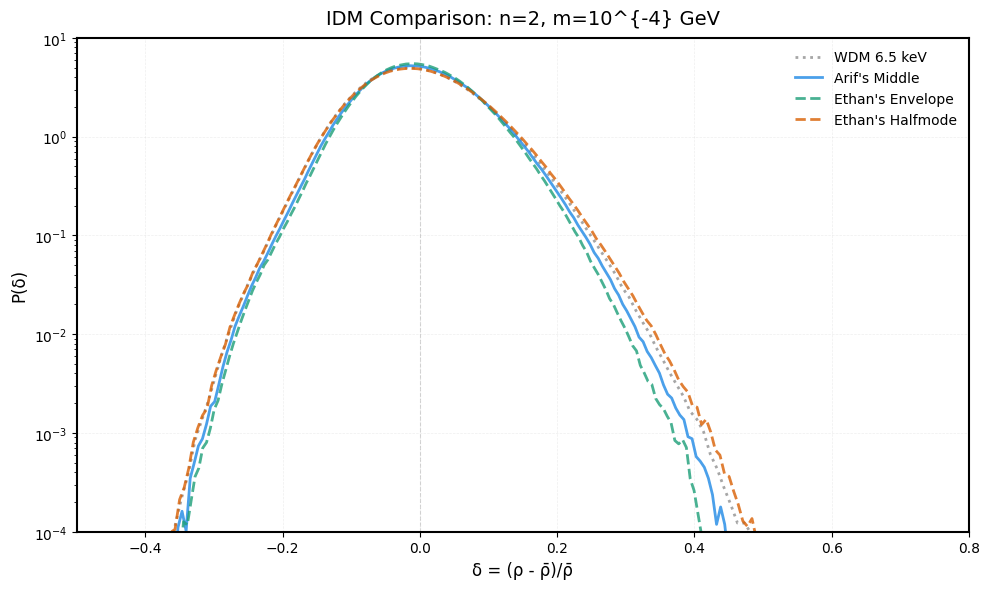

💾 Saved: comparison_n2_1e-4GeV.pdf

Model: n=2, m=10^{-2} GeV
✅ Your middle: /resnick/groups/carnegie_poc/achu/n2_1e-2GeV_middle_fixed/ic/ic_gadget_dist
✅ Ethan's envelope: /central/groups/carnegie_poc/enadler/ncdm_resims/Halo004/idm_n2_1e-2GeV_envelope/ic/ic_gadget_dist
✅ Ethan's halfmode: /central/groups/carnegie_poc/enadler/ncdm_resims/Halo004/idm_n2_1e-2GeV_halfmode/ic/ic_gadget_dist
✅ Loaded WDM baseline
📊 Loaded Arif's Middle: 150 points
📊 Loaded Ethan's Envelope: 150 points
📊 Loaded Ethan's Halfmode: 150 points


<Figure size 640x480 with 0 Axes>

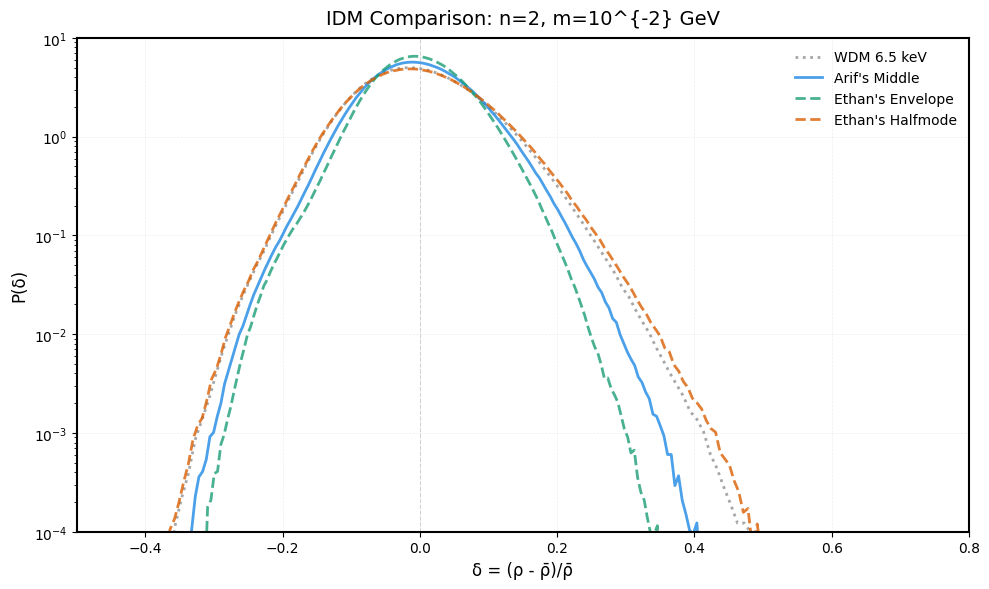

💾 Saved: comparison_n2_1e-2GeV.pdf

Model: n=2, m=1 GeV
✅ Your middle: /resnick/groups/carnegie_poc/achu/n2_1GeV_middle_fixed/ic/ic_gadget_dist
✅ Ethan's envelope: /central/groups/carnegie_poc/enadler/ncdm_resims/Halo004/idm_n2_1GeV_envelope/ic/ic_gadget_dist
✅ Ethan's halfmode: /central/groups/carnegie_poc/enadler/ncdm_resims/Halo004/idm_n2_1GeV_halfmode/ic/ic_gadget_dist
✅ Loaded WDM baseline
📊 Loaded Arif's Middle: 150 points
📊 Loaded Ethan's Envelope: 150 points
📊 Loaded Ethan's Halfmode: 150 points


<Figure size 640x480 with 0 Axes>

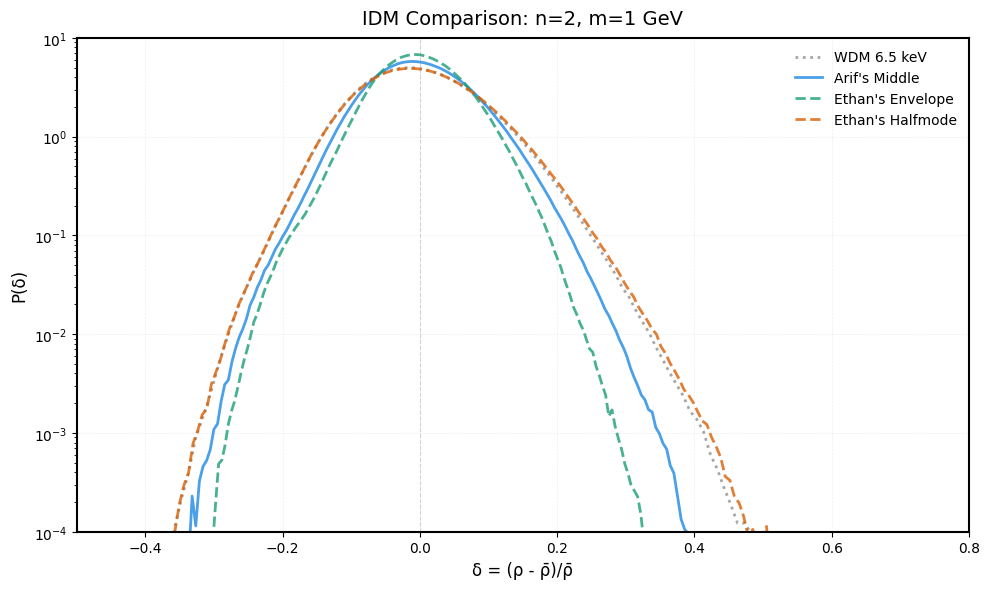

💾 Saved: comparison_n2_1GeV.pdf

Model: n=4, m=10^{-4} GeV
✅ Your middle: /resnick/groups/carnegie_poc/achu/n4_1e-4GeV_middle_fixed/ic/ic_gadget_dist
✅ Ethan's envelope: /central/groups/carnegie_poc/enadler/ncdm_resims/Halo004/idm_1e-4GeV_envelope/ic/ic_gadget_dist
✅ Ethan's halfmode: /central/groups/carnegie_poc/enadler/ncdm_resims/Halo004/idm_1e-4GeV_halfmode/ic/ic_gadget_dist
✅ Loaded WDM baseline
📊 Loaded Arif's Middle: 150 points
📊 Loaded Ethan's Envelope: 150 points
📊 Loaded Ethan's Halfmode: 150 points


<Figure size 640x480 with 0 Axes>

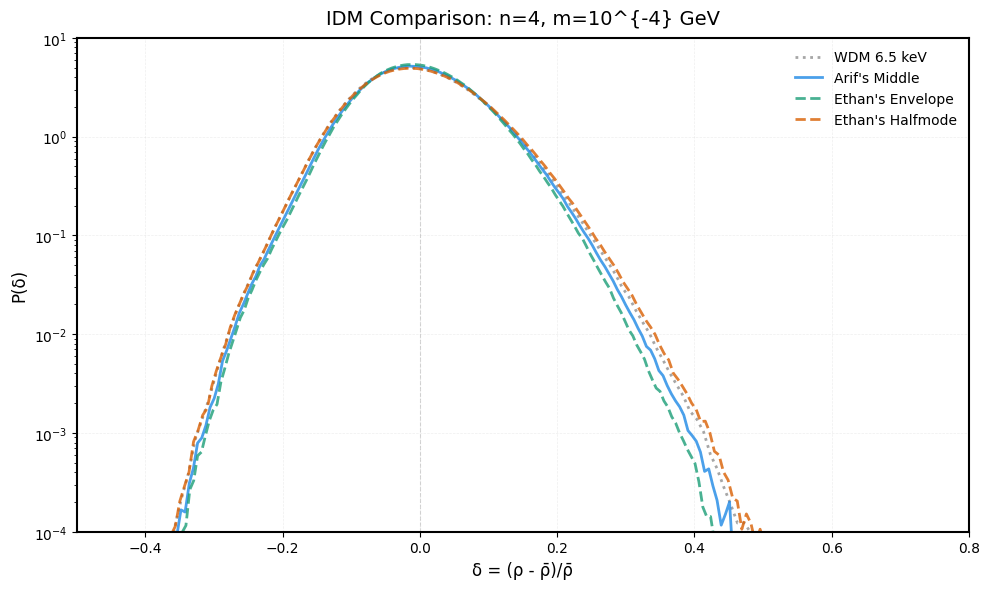

💾 Saved: comparison_n4_1e-4GeV.pdf

Model: n=4, m=10^{-2} GeV
✅ Your middle: /resnick/groups/carnegie_poc/achu/n4_1e-2GeV_middle_fixed/ic/ic_gadget_dist
✅ Ethan's envelope: /central/groups/carnegie_poc/enadler/ncdm_resims/Halo004/idm_1e-2GeV_envelope/ic/ic_gadget_dist
✅ Ethan's halfmode: /central/groups/carnegie_poc/enadler/ncdm_resims/Halo004/idm_1e-2GeV_halfmode/ic/ic_gadget_dist
✅ Loaded WDM baseline
📊 Loaded Arif's Middle: 150 points
📊 Loaded Ethan's Envelope: 150 points
📊 Loaded Ethan's Halfmode: 150 points


<Figure size 640x480 with 0 Axes>

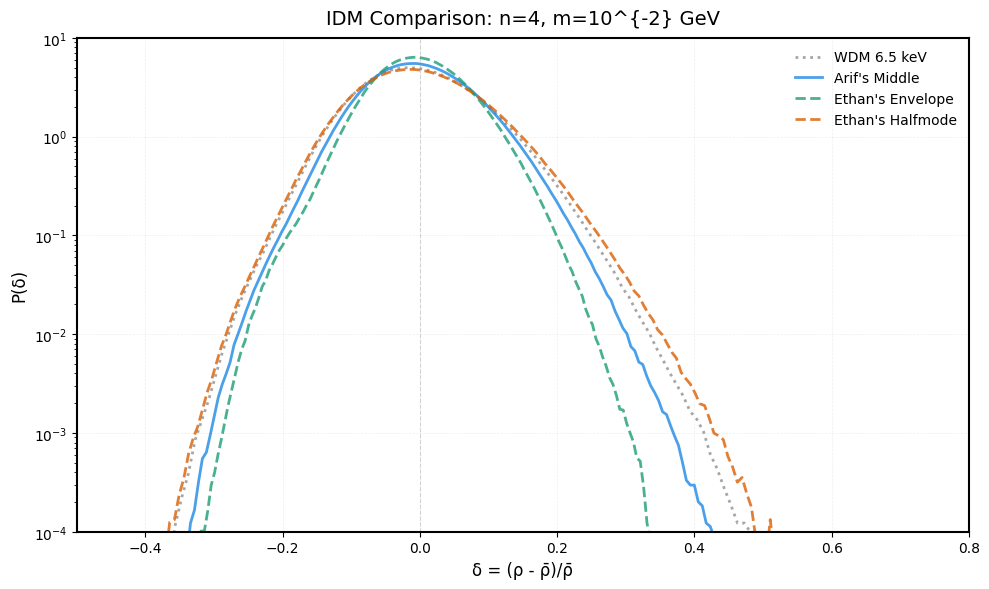

💾 Saved: comparison_n4_1e-2GeV.pdf

Model: n=4, m=1 GeV
✅ Your middle: /resnick/groups/carnegie_poc/achu/n4_1GeV_middle_fixed/ic/ic_gadget_dist
✅ Ethan's envelope: /central/groups/carnegie_poc/enadler/ncdm_resims/Halo004/idm_1GeV_envelope/ic/ic_gadget_dist
✅ Ethan's halfmode: /central/groups/carnegie_poc/enadler/ncdm_resims/Halo004/idm_1GeV_halfmode/ic/ic_gadget_dist
✅ Loaded WDM baseline
📊 Loaded Arif's Middle: 150 points
📊 Loaded Ethan's Envelope: 150 points
📊 Loaded Ethan's Halfmode: 150 points


<Figure size 640x480 with 0 Axes>

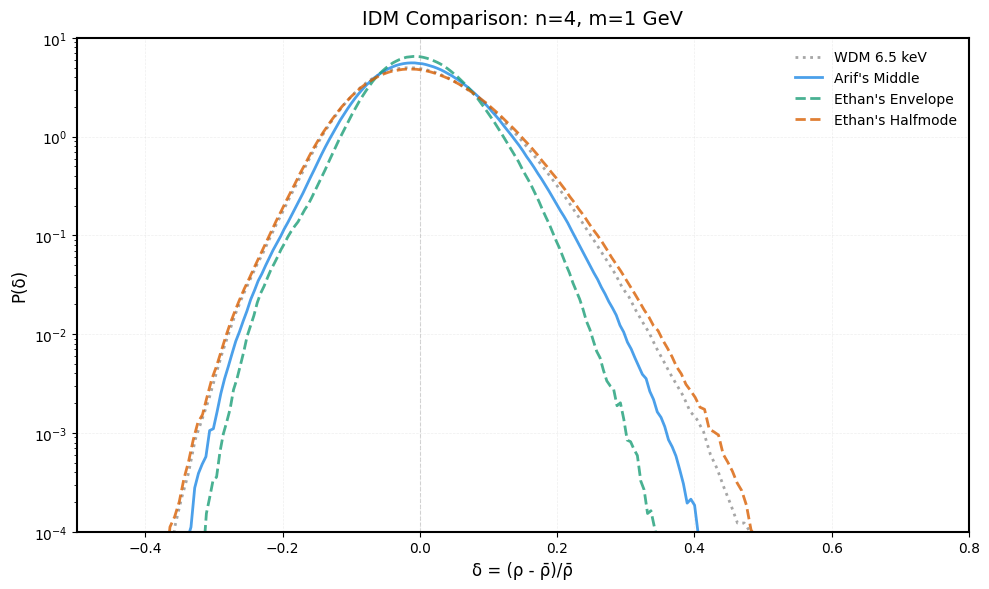

💾 Saved: comparison_n4_1GeV.pdf

COMPLETE!


<Figure size 640x480 with 0 Axes>

In [2]:
figures = show_all_comparisons()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import pynbody

# --- 1. Configuration ---
# Path to YOUR simulation outputs (Middle)
base_path_user = "/central/groups/carnegie_poc/achu"

# Path to ETHAN'S reference ICs (Halfmode/Envelope)
base_path_ethan = "/central/groups/carnegie_poc/enadler/ncdm_resims/Halo004"

# Mass groups to process for n=2
mass_groups = [
    {"id": "1e-4GeV", "label_tex": r"10^{-4} \mathrm{GeV}"},
    {"id": "1e-2GeV", "label_tex": r"10^{-2} \mathrm{GeV}"},
    {"id": "1GeV",    "label_tex": r"1 \mathrm{GeV}"}
]

# --- 2. Helper Functions ---

def load_ic_data(full_path):
    """
    Loads the IC gadget distribution from a specific full path.
    Returns: delta_rho histogram
    """
    if not os.path.exists(full_path):
        return None
        
    try:
        f = pynbody.load(full_path)
        highres_mass = np.min(np.unique(f['mass']))
        rho = f['rho']
        # Calculate histogram
        delta_rho = np.histogram((rho[f['mass']==highres_mass]-np.mean(rho))/np.mean(rho), bins=100)
        return delta_rho
    except Exception as e:
        print(f"    Error loading {full_path}: {e}")
        return None

def get_pdf(delta_rho_hist):
    """Converts histogram to x and p."""
    if delta_rho_hist is None: return None, None
    x = 0.5 * (delta_rho_hist[1][1:] + delta_rho_hist[1][:-1])
    p = delta_rho_hist[0] / np.trapz(delta_rho_hist[0], x)
    return x, p

def find_user_middle_path(base, mass):
    """Finds the user's 'middle' directory."""
    candidates = [
        f"n2_{mass}_middle",
        f"idm_n2_{mass}_middle",
        f"n2_{mass}_intermediate_middle"
    ]
    for cand in candidates:
        # We need to append 'ic/ic_gadget_dist' to the directory
        dir_path = os.path.join(base, cand)
        full_file_path = os.path.join(dir_path, "ic/ic_gadget_dist")
        
        if os.path.exists(full_file_path):
            return full_file_path
    return None

# --- 3. Main Plotting Loop (n=2) ---

print(f"\nGenerating Sandwich Plots for n=2 (Ethan's Paths)...")

# Try to load CDM baseline from Ethan's dir if possible, otherwise skip
path_cdm = os.path.join(base_path_ethan, "cdm/ic/ic_gadget_dist")
x_cdm, p_cdm = get_pdf(load_ic_data(path_cdm))

for group in mass_groups:
    mass_id = group['id']
    label_tex = group['label_tex']
    
    print(f"Processing: n=2 {mass_id}")

    # --- A. Construct Paths ---
    
    # 1. Your Middle Model
    path_user_mid = find_user_middle_path(base_path_user, mass_id)
    
    # 2. Ethan's Reference Models
    # Pattern: /Halo004/idm_n2_[MASS]_[MODE]/ic/ic_gadget_dist
    dir_half = f"idm_n2_{mass_id}_halfmode"
    path_ethan_half = os.path.join(base_path_ethan, dir_half, "ic/ic_gadget_dist")
    
    dir_env = f"idm_n2_{mass_id}_envelope"
    path_ethan_env = os.path.join(base_path_ethan, dir_env, "ic/ic_gadget_dist")

    # --- B. Load Data ---
    x_mid, p_mid   = get_pdf(load_ic_data(path_user_mid))
    x_half, p_half = get_pdf(load_ic_data(path_ethan_half))
    x_env, p_env   = get_pdf(load_ic_data(path_ethan_env))

    # --- C. Validation ---
    if x_mid is None:
        print(f"  Skipping: Your Middle file not found for {mass_id}")
        continue
    
    # --- D. Plotting ---
    plt.figure(figsize=(8, 6))

    # 1. CDM Baseline
    if x_cdm is not None:
        plt.plot(x_cdm, p_cdm, color='black', ls=':', label='CDM', alpha=0.5)

    # 2. Ethan's Bounds (The Sandwich Bread)
    if x_half is not None:
        plt.plot(x_half, p_half, color='#1b9e77', ls='--', linewidth=1.5, 
                 label="Ref (Halfmode)")
    else:
        print(f"  Warning: Ethan's Halfmode file missing at {dir_half}")

    if x_env is not None:
        plt.plot(x_env, p_env, color='#1b9e77', ls=':', linewidth=1.5, 
                 label="Ref (Envelope)")
    else:
        print(f"  Warning: Ethan's Envelope file missing at {dir_env}")

    # 3. Your Middle Model (The Meat)
    plt.plot(x_mid, p_mid, color='black', ls='-', linewidth=2.5, 
             label=f"My Model (Middle)")

    # 4. Formatting
    plt.title(f"IDM n=2, ${label_tex}$: Middle vs Ethan's Bounds", fontsize=16)
    plt.plot(np.zeros(10), np.linspace(1e-4, 7.5, 10), c='gray', ls='--', alpha=0.3)

    plt.legend(loc='upper right', fontsize=12)
    plt.xlabel(r'$\delta$', fontsize=22)
    plt.ylabel(r'$P(\delta)$', fontsize=22)
    plt.yscale('log')

    plt.xlim(-0.45, 0.8)
    plt.ylim(3e-4, 7.5)

    plt.xticks([-0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8],
               [r'$-0.4$', r'$-0.2$', r'$0$', r'$0.2$', r'$0.4$', r'$0.6$', r'$0.8$'],
               fontsize=14)
    plt.yticks([1e-3, 1e-2, 1e-1, 1e0],
               [r'$10^{-3}$', r'$10^{-2}$', r'$10^{-1}$', r'$10^0$'],
               fontsize=14)

    plt.tight_layout()

    output_file = f"Sandwich_Comparison_n2_{mass_id}.pdf"
    plt.savefig(output_file)
    plt.close()
    print(f"  Saved: {output_file}")

print("\nProcessing complete.")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle
import time

# --- 0. Style & Color Definitions ---
plt.style.use('default')
plt.rcParams['figure.facecolor'] = 'w'
plt.rcParams["axes.linewidth"] = 1.5
plt.rcParams["xtick.major.size"] = 8
plt.rcParams["xtick.minor.size"] = 3
plt.rcParams["ytick.major.size"] = 8
plt.rcParams["ytick.minor.size"] = 3
plt.rcParams["xtick.direction"] = "out"
plt.rcParams["ytick.direction"] = "out"
plt.rcParams["legend.frameon"] = False
plt.rcParams["legend.fontsize"] = 10
# DISABLE LaTeX - this is causing the error
plt.rcParams["text.usetex"] = False

# COLORS - Simple colors
C_CDM = 'gray'
C_WDM = 'black'
C_HALFMODE = '#1E88E5'  # Blue
C_ENVELOPE = '#43A047'  # Green
C_HALFMODE_FIXED = '#FF5722'  # Orange
C_ENVELOPE_FIXED = '#9C27B0'  # Purple

def log_message(msg):
    """Log message and print in Jupyter"""
    timestamp = time.strftime("%Y-%m-%d %H:%M:%S")
    full_msg = f"[{timestamp}] {msg}"
    print(full_msg)
    return full_msg

# --- Helper function to get PDF from histogram ---
def get_pdf(histogram_tuple):
    """Convert histogram tuple to PDF"""
    if histogram_tuple is None:
        return None, None
    counts = histogram_tuple[0]
    edges = histogram_tuple[1]
    x = 0.5 * (edges[1:] + edges[:-1])
    p = counts / np.trapz(counts, x)
    return x, p

# --- Function to find IC file in directory ---
def find_ic_file(path):
    """Find the IC file in a directory, checking multiple possible locations"""
    if not path or not os.path.exists(path):
        return None
    
    # Check common locations
    possible_paths = [
        os.path.join(path, 'ic/ic_gadget_dist'),
        os.path.join(path, 'ic_gadget_dist'),
        os.path.join(path, 'output/ic/ic_gadget_dist'),
        os.path.join(path, 'ics/ic_gadget_dist'),
        os.path.join(path, 'ic'),  # Sometimes it's just a directory called 'ic'
    ]
    
    for ic_path in possible_paths:
        if os.path.exists(ic_path):
            return ic_path
    
    # Try to find any gadget file in ic directory
    try:
        ic_dir = os.path.join(path, 'ic')
        if os.path.exists(ic_dir):
            for file in os.listdir(ic_dir):
                if 'ic' in file.lower() and ('gadget' in file.lower() or 'snap' in file.lower()):
                    return os.path.join(ic_dir, file)
        
        # Look for any snapshot file in the directory
        for root, dirs, files in os.walk(path):
            for file in files:
                if file.endswith('.0') or 'snap' in file.lower() or 'ic' in file.lower():
                    return os.path.join(root, file)
    except:
        pass
    
    return None

def load_density_data_from_path(path, model_id=""):
    """Load density data from a given path"""
    if not path:
        print(f"    ⚠ No path provided for {model_id}")
        return None, None
    
    # Find IC file
    ic_file = find_ic_file(path if os.path.isdir(path) else os.path.dirname(path))
    if not ic_file:
        print(f"    ❌ Could not find IC file in: {path}")
        return None, None
    
    try:
        import pynbody
        print(f"    📂 Loading: {ic_file}")
        f = pynbody.load(ic_file)
        
        # Get high-res particles
        highres_mass = np.min(np.unique(f['mass']))
        mask = f['mass'] == highres_mass
        
        if np.sum(mask) == 0:
            print(f"    ⚠ No high-res particles found in {ic_file}")
            return None, None
        
        rho = f['rho'][mask]
        delta = (rho - np.mean(rho)) / np.mean(rho)
        
        # Use more bins for better PDF
        hist, edges = np.histogram(delta, bins=150, density=True)
        x = 0.5 * (edges[1:] + edges[:-1])
        p = hist / np.trapz(hist, x)
        
        print(f"    ✅ Loaded {len(x)} points, mean δ = {np.mean(delta):.3f}, std = {np.std(delta):.3f}")
        return x, p
        
    except Exception as e:
        print(f"    ❌ Error loading {ic_file}: {e}")
        return None, None

def create_simple_plot(model, x_cdm=None, p_cdm=None, x_wdm=None, p_wdm=None):
    """Create SIMPLE plot with just Original, Fixed, and WDM"""
    
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Track what we're plotting
    plotted_items = []
    
    # 1. Plot WDM baseline (ONLY WDM, no CDM)
    if x_wdm is not None and p_wdm is not None:
        ax.plot(x_wdm, p_wdm, color=C_WDM, ls=':', lw=2.5, alpha=0.8, label='WDM 6.5 keV')
        plotted_items.append('WDM')
    
    # 2. Load and plot original model
    x_orig, p_orig = None, None
    if model['original_exists']:
        print(f"  📁 Loading original data from: {model['original_dir']}")
        x_orig, p_orig = load_density_data_from_path(model['original_dir'], f"{model['id']}_orig")
        if x_orig is not None and p_orig is not None:
            color = C_HALFMODE if model['type'] == 'halfmode' else C_ENVELOPE
            ax.plot(x_orig, p_orig, color=color, ls='-', lw=2.5, alpha=0.9,
                   label=f'Original')
            plotted_items.append('Original')
        else:
            print(f"  ⚠ Could not load original data for {model['id']}")
    
    # 3. Load and plot fixed model
    x_fixed, p_fixed = None, None
    if model['fixed_exists']:
        print(f"  📁 Loading fixed data from: {model['fixed_dir']}")
        x_fixed, p_fixed = load_density_data_from_path(model['fixed_dir'], f"{model['id']}_fixed")
        if x_fixed is not None and p_fixed is not None:
            color = C_HALFMODE_FIXED if model['type'] == 'halfmode' else C_ENVELOPE_FIXED
            ax.plot(x_fixed, p_fixed, color=color, ls='-', lw=2.5, alpha=0.9,
                   label=f'Fixed')
            plotted_items.append('Fixed')
        else:
            print(f"  ⚠ Could not load fixed data for {model['id']}")
    
    # 4. Formatting
    ax.axvline(0, color='gray', ls='--', alpha=0.3, lw=0.8)
    
    # SIMPLE title without LaTeX
    type_display = "Half-mode" if model['type'] == 'halfmode' else "Envelope"
    title = f"IDM n={model['n']}, {model['mass_label']}, {type_display}"
    ax.set_title(title, fontsize=14, pad=10)
    
    # Create legend with all items
    handles, labels = ax.get_legend_handles_labels()
    if handles:  # Only create legend if we have items
        ax.legend(loc='upper right', fontsize=11)
    else:
        print(f"  ⚠ No data plotted for {model['id']}!")
    
    # SIMPLE labels without LaTeX
    ax.set_xlabel('δ = (ρ - ρ̄)/ρ̄', fontsize=14)
    ax.set_ylabel('P(δ)', fontsize=14)
    ax.set_yscale('log')
    ax.set_xlim(-0.5, 0.8)
    ax.set_ylim(1e-4, 10)
    ax.grid(True, alpha=0.2, linestyle='--', linewidth=0.5)
    
    # Remove the problematic text box with Unicode checkmarks
    # This was causing the LaTeX error
    
    plt.tight_layout()
    return fig, plotted_items, (x_orig, p_orig, x_fixed, p_fixed)

# --- Main function for Jupyter ---
def generate_simple_plots(overwrite=True):
    """Main function to generate SIMPLE plots in Jupyter"""
    
    print("=" * 80)
    print("Starting SIMPLE IC comparison plot generation - INTERMEDIATE MODELS")
    print("=" * 80)
    
    # Remove old plot files if overwriting
    if overwrite:
        print("🗑️ Removing old plot files...")
        for f in os.listdir('.'):
            if f.startswith('P_delta_n2_') and (f.endswith('.pdf') or f.endswith('.png')):
                os.remove(f)
                print(f"  Removed: {f}")
        if os.path.exists("summary_intermediate_models_comparison.pdf"):
            os.remove("summary_intermediate_models_comparison.pdf")
        if os.path.exists("summary_intermediate_models_comparison.png"):
            os.remove("summary_intermediate_models_comparison.png")
    
    # --- 1. Load Pre-computed Data ---
    print("\n📊 Loading pre-computed density data...")
    start_load = time.time()
    
    baselines_loaded = False
    try:
        with open('/central/groups/carnegie_poc/enadler/ncdm_resims/analysis/ic_density_velocity.bin', 'rb') as f:
            ic_density_velocity = pickle.load(f, encoding='latin1')
        print(f"✅ Pre-computed data loaded in {time.time()-start_load:.1f}s")
        
        # Get CDM and WDM baselines
        if 'Halo004' in ic_density_velocity:
            if 'cdm' in ic_density_velocity['Halo004']:
                delta_rho_cdm = ic_density_velocity['Halo004']['cdm'][0]
                x_cdm, p_cdm = get_pdf(delta_rho_cdm)
                print("  Loaded CDM baseline (not using)")
            
            if 'wdm_6.5' in ic_density_velocity['Halo004']:
                delta_rho_wdm = ic_density_velocity['Halo004']['wdm_6.5'][0]
                x_wdm, p_wdm = get_pdf(delta_rho_wdm)
                print("  Loaded WDM 6.5 keV baseline")
                baselines_loaded = True
        
    except Exception as e:
        print(f"❌ Error loading pre-computed data: {e}")
        x_cdm, p_cdm, x_wdm, p_wdm = None, None, None, None
    
    # --- 2. Define INTERMEDIATE MODELS ---
    base_path = "/central/groups/carnegie_poc/achu"
    all_models = []
    
    # Define the specific intermediate models we want to process
    intermediate_models = [
        {"n": 2, "mass": "1e-1GeV", "type": "envelope"},
        {"n": 2, "mass": "1e-1GeV", "type": "halfmode"},
        {"n": 2, "mass": "1e-3GeV", "type": "envelope"},
        {"n": 2, "mass": "1e-3GeV", "type": "halfmode"},
    ]
    
    print("\n🔍 Checking model directories...")
    for model_info in intermediate_models:
        n = model_info["n"]
        mass = model_info["mass"]
        model_type = model_info["type"]
        
        model_id = f"n{n}_{mass}_{model_type}"
        original_dir = os.path.join(base_path, f"n{n}_{mass}_intermediate_{model_type}")
        fixed_dir = os.path.join(base_path, f"n{n}_{mass}_intermediate_{model_type}_fixed")
        
        # Check directories
        original_exists = os.path.exists(original_dir)
        fixed_exists = os.path.exists(fixed_dir)
        
        print(f"\n  Model {model_id}:")
        print(f"    Original dir: {original_dir} - {'✅ EXISTS' if original_exists else '❌ NOT FOUND'}")
        print(f"    Fixed dir: {fixed_dir} - {'✅ EXISTS' if fixed_exists else '❌ NOT FOUND'}")
        
        if not (original_exists or fixed_exists):
            print(f"    ⚠ Warning: Neither directory exists for {model_id}")
            continue
        
        # Use plain text for mass label
        mass_label = "10^{-1} GeV" if "1e-1" in mass else "10^{-3} GeV"
        
        all_models.append({
            "id": model_id,
            "n": n,
            "mass": mass,
            "type": model_type,
            "mass_label": mass_label,  # Plain text, not LaTeX
            "original_dir": original_dir if original_exists else None,
            "fixed_dir": fixed_dir if fixed_exists else None,
            "original_exists": original_exists,
            "fixed_exists": fixed_exists,
            "outfile": f"P_delta_{model_id}_comparison.pdf",
            "outfile_png": f"P_delta_{model_id}_comparison.png"
        })
    
    print(f"\n📋 Found {len(all_models)} intermediate models to process")
    
    if len(all_models) == 0:
        print("❌ No models found to process!")
        return
    
    # --- 3. Process each model ---
    print("\n" + "=" * 60)
    print("Generating SIMPLE plots...")
    print("=" * 60)
    
    start_time = time.time()
    plot_data = {}  # Store data for summary plot
    successful_models = []
    failed_models = []
    
    # SIMPLE LOOP
    for i, model in enumerate(all_models):
        print(f"\n{'='*50}")
        print(f"📈 Processing model {i+1}/{len(all_models)}: {model['id']}")
        print(f"{'='*50}")
        
        plot_start = time.time()
        
        try:
            # Check if we have at least one version to plot
            if not (model['original_exists'] or model['fixed_exists']):
                print(f"  ⚠ Skipping {model['id']}: No data directories found")
                failed_models.append(model['id'])
                continue
            
            # Create the SIMPLE plot
            fig, plotted_items, data = create_simple_plot(
                model, x_cdm, p_cdm, x_wdm, p_wdm
            )
            
            if not plotted_items:
                print(f"  ⚠ No data plotted for {model['id']}")
                failed_models.append(model['id'])
                continue
            
            # Save outputs
            plt.savefig(model["outfile"], dpi=150, bbox_inches='tight')
            plt.savefig(model["outfile_png"], dpi=150, bbox_inches='tight')
            plt.close(fig)
            
            plot_time = time.time() - plot_start
            successful_models.append(model['id'])
            
            print(f"✅ Created {model['outfile']} ({plot_time:.1f}s)")
            print(f"  Plotted items: {', '.join(plotted_items)}")
            
        except Exception as e:
            plot_time = time.time() - plot_start
            failed_models.append(model['id'])
            
            print(f"❌ Error for {model['id']}: {e}")
            import traceback
            print(f"Traceback: {traceback.format_exc()}")
            continue
    
    # --- 5. Summary ---
    total_time = time.time() - start_time
    print("\n" + "=" * 80)
    print("FINAL SUMMARY - INTERMEDIATE MODELS")
    print("=" * 80)
    print(f"Total time: {total_time:.1f} seconds")
    print(f"Total intermediate models: {len(all_models)}")
    print(f"Successfully plotted: {len(successful_models)}")
    print(f"Failed: {len(failed_models)}")
    
    if successful_models:
        print("\n✅ Successful models:")
        for model_id in successful_models:
            print(f"  - {model_id}")
    
    if failed_models:
        print("\n❌ Failed models:")
        for model_id in failed_models:
            print(f"  - {model_id}")
    
    print("\n📄 Generated files:")
    pdf_files = [f for f in os.listdir('.') if f.startswith('P_delta_n2_') and f.endswith('.pdf')]
    png_files = [f for f in os.listdir('.') if f.startswith('P_delta_n2_') and f.endswith('.png')]
    
    print(f"  Individual PDF files: {len(pdf_files)}")
    print(f"  Individual PNG files: {len(png_files)}")
    
    if pdf_files:
        print("\n📋 Generated PDF files:")
        for f in sorted(pdf_files):
            print(f"  - {f}")
    
    print("\n" + "=" * 80)
    print("✅ SIMPLE plot generation complete!")
    print("=" * 80)
    
    return successful_models, failed_models

# --- Run in Jupyter ---
if __name__ == "__main__":
    # To run in Jupyter, just call:
    generate_simple_plots(overwrite=True)
    print("Ready to generate SIMPLE plots! Call generate_simple_plots(overwrite=True) to run.")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import pynbody

# --- 0. Style & Color Definitions ---
plt.style.use('default')
plt.rcParams['figure.facecolor'] = 'w'
plt.rcParams["axes.linewidth"]  = 1.5
plt.rcParams["xtick.major.size"]  = 8
plt.rcParams["xtick.minor.size"]  = 3
plt.rcParams["ytick.major.size"]  = 8
plt.rcParams["ytick.minor.size"]  = 3
plt.rcParams["xtick.direction"]  = "out"
plt.rcParams["ytick.direction"]  = "out"
plt.rcParams["legend.frameon"] = False
try:
    plt.rc("text", usetex=True)
except:
    pass

# --- COLOR SCHEME ---
# Reference lines are Black with different styles
C_REF_CDM = 'black'
C_REF_WDM65 = 'black'

# Your models (UPDATED COLORS)
C_ARIF_HM  = '#d62728'  # Red for Half-mode
C_ARIF_ENV = '#33BBFF'  # Blue for Envelope

# --- Helper Functions ---
def load_ic_density_velocity(path, COMP=False):
    """
    Loads IC snapshot and calculates density histograms using pynbody.
    """
    filename = os.path.join(path, 'ic/ic_gadget_dist')
    
    if not os.path.exists(filename):
        return None, None

    try:
        f = pynbody.load(filename)
        highres_mass = np.min(np.unique(f['mass']))
        mask = f['mass'] == highres_mass
        rho = f['rho'][mask]
        delta_rho = np.histogram((rho - np.mean(rho))/np.mean(rho), bins=100)
        return delta_rho, None
    except Exception as e:
        print(f"Error loading {filename}: {e}")
        return None, None

def get_pdf(histogram_tuple):
    if histogram_tuple is None: return None, None
    counts = histogram_tuple[0]
    edges = histogram_tuple[1]
    x = 0.5 * (edges[1:] + edges[:-1])
    p = counts / np.trapz(counts, x)
    return x, p

# --- 1. Define the 8 "Intermediate" Models ---
base_path = "/central/groups/carnegie_poc/achu"

models_to_plot = [
    { "path": os.path.join(base_path, "n2_1e-1GeV_intermediate_halfmode/"),   "type": "halfmode", "label": r"IDM n=2, $10^{-1}$ GeV (int. halfmode)", "outfile": "P_delta_n2_1e-1GeV_intermediate_halfmode.png" },
    { "path": os.path.join(base_path, "n2_1e-1GeV_intermediate_envelope/"),   "type": "envelope", "label": r"IDM n=2, $10^{-1}$ GeV (int. envelope)", "outfile": "P_delta_n2_1e-1GeV_intermediate_envelope.png" },
    { "path": os.path.join(base_path, "n2_1e-3GeV_intermediate_halfmode/"),   "type": "halfmode", "label": r"IDM n=2, $10^{-3}$ GeV (int. halfmode)", "outfile": "P_delta_n2_1e-3GeV_intermediate_halfmode.png" },
    { "path": os.path.join(base_path, "n2_1e-3GeV_intermediate_envelope/"),   "type": "envelope", "label": r"IDM n=2, $10^{-3}$ GeV (int. envelope)", "outfile": "P_delta_n2_1e-3GeV_intermediate_envelope.png" },
    { "path": os.path.join(base_path, "n4_1e-1GeV_intermediate_halfmode/"),   "type": "halfmode", "label": r"IDM n=4, $10^{-1}$ GeV (int. halfmode)", "outfile": "P_delta_n4_1e-1GeV_intermediate_halfmode.png" },
    { "path": os.path.join(base_path, "n4_1e-1GeV_intermediate_envelope/"),   "type": "envelope", "label": r"IDM n=4, $10^{-1}$ GeV (int. envelope)", "outfile": "P_delta_n4_1e-1GeV_intermediate_envelope.png" },
    { "path": os.path.join(base_path, "n4_1e-3GeV_intermediate_halfmode/"),   "type": "halfmode", "label": r"IDM n=4, $10^{-3}$ GeV (int. halfmode)", "outfile": "P_delta_n4_1e-3GeV_intermediate_halfmode.png" },
    { "path": os.path.join(base_path, "n4_1e-3GeV_intermediate_envelope/"),   "type": "envelope", "label": r"IDM n=4, $10^{-3}$ GeV (int. envelope)", "outfile": "P_delta_n4_1e-3GeV_intermediate_envelope.png" }
]

# --- 2. Load Baseline Data (CDM, WDM 6.5 ONLY) ---
print("Loading baseline data from notebook variable...")
try:
    # Assumes 'ic_density_velocity' is already loaded in your notebook environment
    # CDM
    d_cdm = ic_density_velocity['Halo004']['cdm'][0]
    x_cdm, p_cdm = get_pdf(d_cdm)
    
    # WDM 6.5 keV (The constraint line)
    d_wdm65 = ic_density_velocity['Halo004']['wdm_6.5'][0]
    x_wdm65, p_wdm65 = get_pdf(d_wdm65)
    
    print("✅ Baseline data loaded.")
except NameError:
    print("FATAL: 'ic_density_velocity' variable not found. Please run the cell loading the pickle file first.")
    sys.exit()
except KeyError as e:
    print(f"FATAL: Could not find key {e} in pickle data.")
    sys.exit()

# --- 3. Plotting Loop ---
print(f"\nGenerating {len(models_to_plot)} plots...")

for model in models_to_plot:
    print(f"  -> Processing: {model['label']}")
    
    try:
        # Load Arif's Model
        delta_rho_arif, _ = load_ic_density_velocity(model["path"])
        
        if delta_rho_arif is None:
            print(f"     Skipping: Data not found at {model['path']}")
            continue

        x_arif, p_arif = get_pdf(delta_rho_arif)
        
        # Setup Plot
        plt.figure(figsize=(8, 6))
        
        # 1. Reference Lines (Black)
        # CDM (Baseline)
        plt.plot(x_cdm, p_cdm, color=C_REF_CDM, ls=':', lw=2, label='CDM')
        
        # WDM 6.5 keV (Constraint Only)
        plt.plot(x_wdm65, p_wdm65, color=C_REF_WDM65, ls='--', lw=2, label='WDM 6.5 keV')

        # 2. Arif's Model (Blue if Envelope, Red if Halfmode)
        # UPDATED LOGIC HERE
        color_my = C_ARIF_ENV if model['type'] == 'envelope' else C_ARIF_HM
        plt.plot(x_arif, p_arif, color=color_my, ls='-', lw=2.5, label=model['label'])
        
        # Styling
        plt.axvline(0, color='gray', ls='--', alpha=0.3)
        plt.title(model["label"], fontsize=16)
        plt.legend(loc='upper right', fontsize=12)
        
        plt.xlabel(r'$\delta$', fontsize=22)
        plt.ylabel(r'$P(\delta)$', fontsize=22)
        plt.yscale('log')
        plt.xlim(-0.45, 0.8)
        plt.ylim(3e-4, 7.5)
        
        # Ticks
        plt.xticks([-0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8],
                   [r'$-0.4$', r'$-0.2$', r'$0$', r'$0.2$', r'$0.4$', r'$0.6$', r'$0.8$'],
                   fontsize=14)
        plt.yticks([1e-3, 1e-2, 1e-1, 1e0],
                   [r'$10^{-3}$', r'$10^{-2}$', r'$10^{-1}$', r'$10^0$'],
                   fontsize=14)
        
        plt.tight_layout()
        plt.savefig(model["outfile"], dpi=300)
        plt.close()
        print(f"     Saved: {model['outfile']}")

    except Exception as e:
        print(f"     ERROR: {e}")

print("\nDone.")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import pynbody

# --- 1. Setup and Definitions ---
base_path = "/central/groups/carnegie_poc/achu"

# The list of intermediate models identified from your directory
intermediate_models = [
    "n2_1e-1GeV_intermediate_envelope",
    "n2_1e-1GeV_intermediate_halfmode",
    "n2_1e-3GeV_intermediate_envelope",
    "n2_1e-3GeV_intermediate_halfmode",
    "n4_1e-1GeV_intermediate_envelope",
    "n4_1e-1GeV_intermediate_halfmode",
    "n4_1e-3GeV_intermediate_envelope",
    "n4_1e-3GeV_intermediate_halfmode"
]

def load_ic_density_velocity(path):
    # Loads the IC gadget distribution file
    try:
        f = pynbody.load(os.path.join(path, 'ic/ic_gadget_dist'))
        highres_mass = np.min(np.unique(f['mass']))
        rho = f['rho']
        
        # Calculate histogram for density contrast (delta)
        # (rho - mean) / mean
        delta_rho = np.histogram((rho[f['mass']==highres_mass]-np.mean(rho))/np.mean(rho), bins=100)
        return delta_rho
    except Exception as e:
        print(f"Error reading {path}: {e}")
        return None

def get_pdf(delta_rho_hist):
    # Converts histogram data into x (delta) and y (normalized PDF)
    x = 0.5 * (delta_rho_hist[1][1:] + delta_rho_hist[1][:-1])
    p = delta_rho_hist[0] / np.trapz(delta_rho_hist[0], x)
    return x, p

# --- 2. Load Baseline Data (CDM & WDM 5.9keV) ---
print("Loading baseline CDM and WDM data...")

try:
    # Note: Assumes 'ic_density_velocity' dictionary is already loaded in your notebook memory
    # from previous cells. 
    
    # CDM Baseline
    delta_rho_cdm = ic_density_velocity['Halo004']['cdm'][0]
    x_cdm, p_cdm = get_pdf(delta_rho_cdm)

    # WDM 5.9 keV Baseline
    # CHECK: Ensure your dictionary has the key 'wdm_5.9' or 'wdm_5.9kev'
    # If you haven't run the 5.9 simulation yet, swap this line for 'wdm_6' as a placeholder.
    if 'wdm_5.9' in ic_density_velocity['Halo004']:
        delta_rho_wdm = ic_density_velocity['Halo004']['wdm_5.9'][0]
        wdm_label = "WDM 5.9 keV"
    elif 'wdm_6' in ic_density_velocity['Halo004']:
        print("Warning: WDM 5.9 not found, using WDM 6.0 as proxy.")
        delta_rho_wdm = ic_density_velocity['Halo004']['wdm_6'][0]
        wdm_label = "WDM 6.0 keV"
    else:
        raise ValueError("No WDM baseline data found in dictionary.")

    x_wdm, p_wdm = get_pdf(delta_rho_wdm)
    
    print("✅ Baselines loaded.")

except NameError:
    print("FATAL ERROR: 'ic_density_velocity' variable not found. Please run previous notebook cells.")
    sys.exit()

# --- 3. Loop and Plot Each Model Individually ---

for model_dir in intermediate_models:
    full_path = os.path.join(base_path, model_dir)
    print(f"Processing: {model_dir}...")

    # Load IDM data
    delta_rho_idm = load_ic_density_velocity(full_path)
    
    if delta_rho_idm is not None:
        x_idm, p_idm = get_pdf(delta_rho_idm)
        
        # --- PLOTTING ---
        plt.figure(figsize=(8, 6))

        # 1. Plot Baselines
        plt.plot(x_cdm, p_cdm, color='black', ls=':', label='CDM', linewidth=2)
        plt.plot(x_wdm, p_wdm, color="#CC4400", ls='--', label=wdm_label, linewidth=2)

        # 2. Plot Current Intermediate Model
        # Clean up label for display
        label_clean = model_dir.replace('_intermediate', '').replace('_', ' ')
        plt.plot(x_idm, p_idm, color='blue', ls='-', label=label_clean, linewidth=2)

        # 3. Styling
        plt.title(f"IC Distribution: {label_clean}", fontsize=14)
        plt.plot(np.zeros(10), np.linspace(1e-4, 7.5, 10), c='gray', ls='--', alpha=0.5) # Vertical line at 0

        plt.legend(loc='upper right', fontsize=12)
        plt.xlabel(r'$\delta$', fontsize=22)
        plt.ylabel(r'$P(\delta)$', fontsize=22)
        plt.yscale('log')

        # Axis limits
        plt.xlim(-0.45, 0.8)
        plt.ylim(3e-4, 7.5)

        # Ticks
        plt.xticks([-0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8],
                   [r'$-0.4$', r'$-0.2$', r'$0$', r'$0.2$', r'$0.4$', r'$0.6$', r'$0.8$'],
                   fontsize=14)
        plt.yticks([1e-3, 1e-2, 1e-1, 1e0],
                   [r'$10^{-3}$', r'$10^{-2}$', r'$10^{-1}$', r'$10^0$'],
                   fontsize=14)

        plt.tight_layout()

        # Save individual plot
        output_filename = f"P_delta_{model_dir}.png"
        plt.savefig(output_filename)
        plt.close() # Close figure to free memory
        
        print(f"   -> Saved {output_filename}")

print("\nAll plots generated.")

In [ ]:
# === Path to the IDM 10^-2 GeV halfmode simulation ===
idm_path = '/central/groups/carnegie_poc/achu/idm_n4_1e-2GeV_halfmode/'
idm_path_2 = '/central/groups/carnegie_poc/achu/idm_n4_1e-2GeV_halfmode/'

# Load and process that IC snapshot
delta_rho_idm, _ = load_ic_density_velocity(idm_path, COMP=False)
delta_rho_idm_2, _ = load_ic_density_velocity(idm_path_2, COMP=True)

delta_rho_cdm = ic_density_velocity['Halo004']['cdm'][0]

# === Plotting ===
plt.figure(figsize=(8, 6))

# Midpoints of bins
x_cdm = 0.5 * (delta_rho_cdm[1][1:] + delta_rho_cdm[1][:-1])
x_idm = 0.5 * (delta_rho_idm[1][1:] + delta_rho_idm[1][:-1])
x_idm_2 = 0.5 * (delta_rho_idm_2[1][1:] + delta_rho_idm_2[1][:-1])

# Normalize the histograms
p_cdm = delta_rho_cdm[0] / np.trapz(delta_rho_cdm[0], x_cdm)
p_idm = delta_rho_idm[0] / np.trapz(delta_rho_idm[0], x_idm)
p_idm_2 = delta_rho_idm_2[0] / np.trapz(delta_rho_idm_2[0], x_idm_2)

# Plot CDM
plt.plot(x_cdm, p_cdm, color='black', ls=':', label='CDM')

# Plot IDM 10^-2 GeV Halfmode
plt.plot(x_idm, p_idm, color='blue', ls='-', label="Arif's IDM $10^{-2}$ GeV (halfmode)")
plt.plot(x_idm_2, p_idm_2, color='red', ls='--', label="Ethan's IDM $10^{-2}$ GeV (halfmode)")

# Optional line at delta = 0
plt.plot(np.zeros(10), np.linspace(1e-4, 7.5, 10), c='gray', ls='--', alpha=0.5)

plt.legend(loc='upper right', fontsize=14)
plt.xlabel(r'$\delta$', fontsize=22)
plt.ylabel(r'$P(\delta)$', fontsize=22)
plt.yscale('log')
plt.xlim(-0.45, 0.8)
plt.ylim(3e-4, 7.5)

plt.xticks([-0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8],
           [r'$-0.4$', r'$-0.2$', r'$0$', r'$0.2$', r'$0.4$', r'$0.6$', r'$0.8$'],
           fontsize=14)
plt.yticks([1e-3, 1e-2, 1e-1, 1e0],
           [r'$10^{-3}$', r'$10^{-2}$', r'$10^{-1}$', r'$10^0$'],
           fontsize=14)

plt.tight_layout()
plt.show()